### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
len(data)

12684

2. Investigate the dataset for missing or problematic data.

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
del data['car'] #car tiene mas del 95% de datos  perdidos


#### 3.1 Analisis de datos de Bar

In [8]:
data['Bar'].isna().sum()   
data['Bar'].fillna('missing', inplace=True) #rellenamos los valores nulos con 'missing'
data['Bar'].isna().sum()

0

#### 3.2 Analisis de datos de Coffehouse

In [9]:
#data.info()
data['CoffeeHouse'].isna().sum()
data['CoffeeHouse'].value_counts()


CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [10]:
data['CoffeeHouse'].fillna('less1', inplace=True) #rellenamos los valores nulos con 'less1'porque es el valor que mas se repite
data['CoffeeHouse'].isna().sum()

0

#### 3.3 Analisis de datos de CarryAway

In [11]:
data['CarryAway'].isna().sum()

151

In [12]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [13]:
data['CarryAway'].fillna('1~3', inplace=True) #rellenamos los valores nulos con '1~3' porque es el valor mas comun

In [14]:
data['CarryAway'].isna().sum()

0

#### 3.4 Analisis de datos de RestaurantLessThan20

In [15]:
data['RestaurantLessThan20'].isna().sum()

130

In [16]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [17]:
data['RestaurantLessThan20'].fillna('1~3', inplace=True) #Se rellenan los valores nulos con '1~3' porque es el valor que mas se repite

In [18]:
data['RestaurantLessThan20'].isna().sum()

0

#### 3.5 Analisis de datos de Restaurant20To50

In [19]:
data['Restaurant20To50'].isna().sum()

189

In [20]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [21]:
data['Restaurant20To50'].fillna('less1', inplace=True) #Se rellenan los valores 'less1' con less1 porque es el valor que mas se repite

In [22]:
data['Restaurant20To50'].isna().sum()

0

4. What proportion of the total observations chose to accept the coupon? 



In [23]:
acceptance_proportion = data['Y'].value_counts(normalize=True)
(acceptance_proportion*100).round()

Y
1    57.0
0    43.0
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

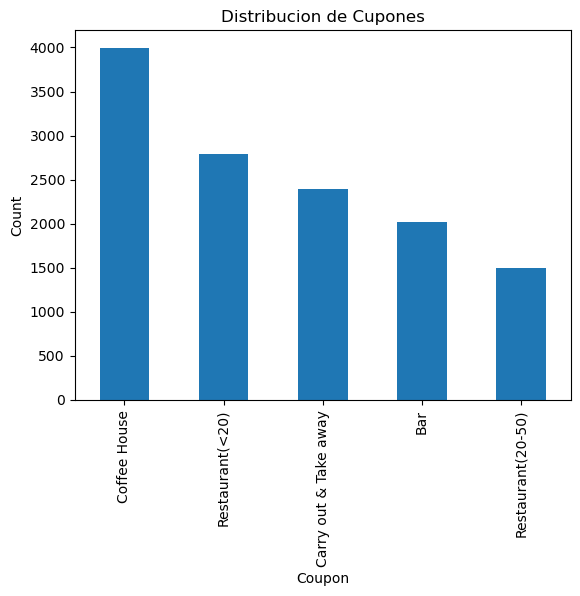

In [24]:
data['coupon'].value_counts().plot(kind='bar')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Distribucion de Cupones')
plt.show()

6. Use a histogram to visualize the temperature column.

c:\Users\pblva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


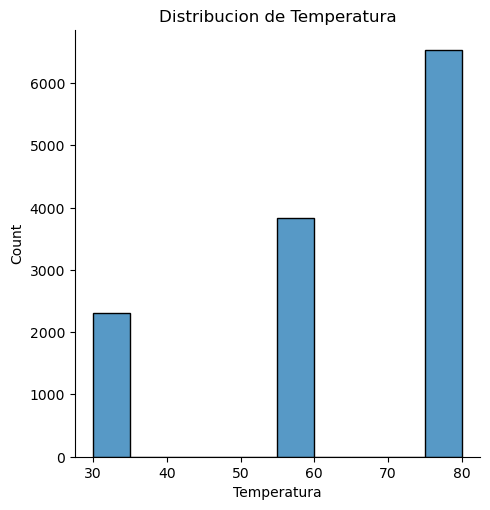

In [25]:


sns.displot(data['temperature'], bins=10)
plt.xlabel('Temperatura')
plt.ylabel('Count')
plt.title('Distribucion de Temperatura')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
bar_coupons.reset_index(drop=True, inplace=True)
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
1,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
2,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2013,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2014,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2015,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [27]:
accepted = (bar_coupons['Y']==1).sum()
non_accepted = (bar_coupons['Y']==0).sum()
acceptance_proportion = accepted/(accepted+non_accepted)
(acceptance_proportion*100).round()

41.0

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
# Filter the DataFrame for drivers who go to a bar 3 or fewer times a month
less_than_3_times = bar_coupons[bar_coupons['Bar'].isin(['less1', '1~3'])]

# Calculate the acceptance rate for drivers who go to a bar 3 or fewer times a month
less_than_3_times_acceptance_rate = (((less_than_3_times['Y']==1).sum() / ((bar_coupons['Y']==1).sum()))*100).round()

# Filter the DataFrame for drivers who go to a bar more than 3 times a month
more_than_3_times = bar_coupons[~bar_coupons['Bar'].isin(['less1', '1~3'])]
#more_than_3_times = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for drivers who go to a bar more than 3 times a month
more_than_3_times_acceptance_rate = ((((more_than_3_times['Y']==1).sum()) / ((bar_coupons['Y']==1).sum()))*100).round()   

# Compare the acceptance rates
acceptance_rate_comparison = pd.DataFrame({'Group': ['3 or fewer times', 'More than 3 times'],
                                           'Acceptance Rate %': [less_than_3_times_acceptance_rate, more_than_3_times_acceptance_rate]})

acceptance_rate_comparison

,Group,Acceptance Rate %
0,3 or fewer times,62.0
1,More than 3 times,38.0


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
bar_coupons['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [30]:
bar_coupons['Bar'].value_counts()

Bar
never      830
less1      570
1~3        397
4~8        150
gt8         49
missing     21
Name: count, dtype: int64

In [31]:
# Filter the DataFrame for drivers who go to a bar more than once a month and are over the age of 25
over_25 = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8', '1~3'])) & (bar_coupons['age'].isin(['26', '31', '50plus', '36', '41', '46']))]

# Calculate the acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
over_25_acceptance_rate = (((over_25['Y']==1).sum())/((bar_coupons['Y']==1).sum())*100).round()

# Calculate the acceptance rate for all other drivers
all_others_acceptance = bar_coupons[((bar_coupons['Bar'].isin(['never', 'less1'])) & (bar_coupons['age'].isin(['below21','21']) ))]

all_others_acceptance_rate = (((all_others_acceptance['Y']==1).sum())/((bar_coupons['Y']==1).sum())*100).round()    

# Compare the acceptance rates
acceptance_rate_comparison = pd.DataFrame({'Group': ['Over 25 and Go to Bar more than Once a Month', 'All Others'],
                                           'Acceptance Rate %': [over_25_acceptance_rate, all_others_acceptance_rate]})

acceptance_rate_comparison

,Group,Acceptance Rate %
0,Over 25 and Go to Bar more than Once a Month,35.0
1,All Others,16.0


Si existe diferencia las personas que aceptan los cupones mayores de 25 anos y van mas de una vez al mes al bar tienen mayor rango de aceptacion de los menores a 25 y no van al bar o van maximo una vez al mes

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [32]:
bar_coupons['passanger'].value_counts()

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [33]:
bar_coupons['occupation'].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [34]:
# Filter the DataFrame for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
filtered_data_1 = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8','1~3'])) & 
                            (bar_coupons['passanger'] != 'Kid(s)') & 
                            (~bar_coupons['occupation'].isin(['Farming, Fishing, or Forestry']))]

filtered_data_2 = bar_coupons[(bar_coupons['Bar'].isin(['never', 'less1'])) |
                            (bar_coupons['passanger'] == 'Kid(s)') |
                            (bar_coupons['occupation'].isin(['Farming, Fishing, or Forestry']))]

# Calculate the acceptance rate for the filtered group
filtered_1_acceptance_rate = (((filtered_data_1['Y']==1).sum() / (bar_coupons['Y']==1).sum())*100).round()

# Calculate the acceptance rate for all others
#all_others = bar_coupons[~bar_coupons.isin(filtered_data_1)] #Los que no cumplen con la condicion anterior

all_others_acceptance_rate = (((filtered_data_2['Y']==1).sum() / (bar_coupons['Y']==1).sum())*100).round()

# Compare the acceptance rate with the acceptance rate for all other drivers
acceptance_rate_comparison = pd.DataFrame({'Group': ['Drivers go to bar more than once a month, no kid passanger and no farming, fishing and forestry occupations', 'All Others'],
                                           'Acceptance Rate': [filtered_1_acceptance_rate, all_others_acceptance_rate]})

acceptance_rate_comparison
#all_others['Bar'].value_counts()

,Group,Acceptance Rate
0,"Drivers go to bar more than once a month, no k...",48.0
1,All Others,52.0


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [35]:
bar_coupons.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   

In [36]:
bar_coupons['maritalStatus'].value_counts()    

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [37]:
bar_coupons['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [38]:
bar_coupons['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      901
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64

In [39]:
bar_coupons['income'].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

In [40]:
bar_coupons['income_less_50k'] = bar_coupons['income'].apply(lambda x: 1 if x == 'Less than $12500' or x == '$12500 - $24999' or x == '$25000 - $37499' or x == '$37500 - $49999'else 0)

In [41]:
bar_coupons['income_less_50k'].value_counts()

income_less_50k
1    1038
0     979
Name: count, dtype: int64

In [42]:
# Filter the DataFrame for drivers who meet the first condition
condition_1 = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                          (bar_coupons['passanger'] != 'Kid(s)') &
                          (bar_coupons['maritalStatus'] != 'Widowed')]

# Calculate the acceptance rate for drivers who meet the first condition
acceptance_rate_1 = (((condition_1['Y']==1).sum() / (bar_coupons['Y']==1).sum())*100).round()

# Filter the DataFrame for drivers who meet the second condition
condition_2 = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                          (bar_coupons['age'].isin(['below21', '21', '26']))]

# Calculate the acceptance rate for drivers who meet the second condition
acceptance_rate_2 = (((condition_2['Y']==1).sum() / (bar_coupons['Y']==1).sum())*100).round()

# Filter the DataFrame for drivers who meet the third condition
condition_3 = bar_coupons[(bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                          (bar_coupons['income_less_50k'] == 1)]

# Calculate the acceptance rate for drivers who meet the third condition
acceptance_rate_3 = (((condition_3['Y']==1).sum() / (bar_coupons['Y']==1).sum())*100).round()

# Create a DataFrame to compare the acceptance rates
acceptance_rate_comparison = pd.DataFrame({'Group': ['Drivers who go to bars more than once a month, had non-kid passengers, and were not widowed',
                                                     'Drivers who go to bars more than once a month and are under the age of 30',
                                                     'Drivers who go to cheap restaurants more than 4 times a month and have income less than 50K'],
                                           'Acceptance Rate': [acceptance_rate_1, acceptance_rate_2, acceptance_rate_3]})

acceptance_rate_comparison

,Group,Acceptance Rate
0,"Drivers who go to bars more than once a month,...",48.0
1,Drivers who go to bars more than once a month ...,30.0
2,Drivers who go to cheap restaurants more than ...,19.0


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [43]:
#plt.bar(['condition_1', 'filtered_acceptance_rate', 'only_less_than_3_times_to bar_acceptance_rate','over_25_acceptance_rate_and_go_more_tha_once_to_bar'], [acceptance_rate_1, filtered_1_acceptance_rate, less_than_3_times_acceptance_rate,over_25_acceptance_rate])


'''
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison')

# Show the plot
plt.show()
'''
import plotly.graph_objects as go

# Create a bar plot using plotly
fig = go.Figure(data=[
    go.Bar(name='condition_1', x=['Acceptance Rate'], y=[acceptance_rate_1], marker_color='blue'),
    go.Bar(name='filtered_acceptance_rate', x=['Acceptance Rate'], y=[filtered_1_acceptance_rate], marker_color='green'),
    go.Bar(name='only_less_than_3_times_to_bar_acceptance_rate', x=['Acceptance Rate'], y=[less_than_3_times_acceptance_rate], marker_color='orange'),
    go.Bar(name='over_25_acceptance_rate_and_go_more_tha_once_to_bar', x=['Acceptance Rate'], y=[over_25_acceptance_rate], marker_color='purple')
])

# Add labels and title
fig.update_layout(
    title='Acceptance Rate Comparison',
    xaxis=dict(title='Group'),
    yaxis=dict(title='Acceptance Rate')
)

# Show the plot
fig.show()

Based on the observations, we can hypothesize that drivers who accepted the bar coupons are more likely to fall into the following categories:

1. Drivers who go to bars more than once a month, had non-kid passengers, and were not widowed and their occupation is farming, fishing or forestry.
2. Drivers who go to bars more than once a month and are over 25
3. Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K.




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [44]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

Based on the results above, I want to discover if the people who go to cheaper restaurants are more likely to get a coupon.

In [64]:
restaurant_cheaper = data[data['coupon'] == 'Restaurant(<20)'].copy()
restaurant_cheaper.reset_index(drop=True, inplace=True)
restaurant_cheaper

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
2,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
4,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
2782,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
2783,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
2784,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


1. First we investigate if gender and age is a principal factor to more likely to get a coupon

In [46]:
restaurant_cheaper['age'].value_counts()

age
21         569
26         561
31         448
50plus     392
36         293
41         247
46         148
below21    128
Name: count, dtype: int64

In [47]:
restaurant_cheaper['gender'].value_counts()

gender
Female    1421
Male      1365
Name: count, dtype: int64

1.1 Consider the ratio acceptance if the person is male and over 30 compare with if is female and the same range age

In [48]:
condition_male_over30 = restaurant_cheaper[(restaurant_cheaper['gender']=='Male') & (restaurant_cheaper['age'].isin(['31', '36', '41', '46', '50plus']))]
condition_male_over30_acceptance = ((condition_male_over30['Y']==1).sum() / (restaurant_cheaper['Y']==1).sum())*100

condition_female_over30 = restaurant_cheaper[(restaurant_cheaper['gender']=='Female') & (restaurant_cheaper['age'].isin(['31', '36', '41', '46', '50plus']))]
condition_female_over30_acceptance = ((condition_female_over30['Y']==1).sum() / (restaurant_cheaper['Y']==1).sum())*100

acceptance_rate_comparison_gender = pd.DataFrame({'Group': ['Drivers who go to cheap restaurant is male and over 30',
                                                     'Drivers who go to cheaper restaurant is female and over 30'
                                                    ],
                                           'Acceptance Rate': [condition_male_over30_acceptance, condition_female_over30_acceptance]})

acceptance_rate_comparison_gender



,Group,Acceptance Rate
0,Drivers who go to cheap restaurant is male and...,24.365482
1,Drivers who go to cheaper restaurant is female...,28.629442


2. Next, we investigate if income is an essential factor which will be another parameter to a person more likely to get a coupon

In [49]:
restaurant_cheaper['income'].value_counts()

income
$25000 - $37499     446
$12500 - $24999     400
$37500 - $49999     396
$100000 or More     379
$50000 - $62499     354
Less than $12500    232
$87500 - $99999     199
$75000 - $87499     192
$62500 - $74999     188
Name: count, dtype: int64

In [50]:
restaurant_cheaper.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
2,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
4,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1


In [51]:
restaurant_cheaper['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      1184
4~8       800
less1     460
gt8       288
never      54
Name: count, dtype: int64

In [52]:
restaurant_cheaper_income_less_50k = restaurant_cheaper[restaurant_cheaper['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

2.2 Compare the acceptance ratio of coupons if a person has income less than 50k, goes to the cheaper restaurant more than 3 times, is single or divorced

In [53]:
restaurant_cheaper['maritalStatus'].value_counts()

maritalStatus
Married partner      1119
Single               1044
Unmarried partner     474
Divorced              120
Widowed                29
Name: count, dtype: int64

In [54]:
condition_poorer_not_maried = restaurant_cheaper_income_less_50k[(restaurant_cheaper_income_less_50k['maritalStatus'].isin(['Single', 'Divorced', 'Widowed'])) & (restaurant_cheaper_income_less_50k['RestaurantLessThan20'].isin(['4~8', 'gt8']))]

In [55]:
condition_poorer_not_maried_acceptance = ((condition_poorer_not_maried['Y']==1).sum() / (restaurant_cheaper_income_less_50k['Y']==1).sum())*100
condition_poorer_not_maried_acceptance

18.98854961832061

2.3 we go over other condition about marital status

In [56]:
condition_poorer_not_alone = restaurant_cheaper_income_less_50k[(restaurant_cheaper_income_less_50k['maritalStatus'].isin(['Married partner','Unmarried partner'])) & (restaurant_cheaper_income_less_50k['RestaurantLessThan20'].isin(['4~8', 'gt8']))]


In [57]:
condition_poorer_not_alone_acceptance = ((condition_poorer_not_alone['Y']==1).sum() / (restaurant_cheaper_income_less_50k['Y']==1).sum())*100
condition_poorer_not_alone_acceptance

15.267175572519085

2.4 we got other condition about go to the cheaper restaurant less than 3 times

In [58]:
condition_poorer_alone_not_go_restaurant = restaurant_cheaper_income_less_50k[(restaurant_cheaper_income_less_50k['maritalStatus'].isin(['Single', 'Divorced', 'Widowed'])) & (restaurant_cheaper_income_less_50k['RestaurantLessThan20'].isin(['less1', '1~3']))]

2.5 Condition if the income of a person is less than 50k is alone and go less than 3 times to cheaper restaurant


In [112]:
condition_poorer_alone_not_go_restaurant_acceptance = ((condition_poorer_alone_not_go_restaurant['Y']==1).sum() / (restaurant_cheaper_income_less_50k['Y']==1).sum())*100
condition_poorer_alone_not_go_restaurant_acceptance

35.49618320610687

2.6 What about if he/she gain more than 50k

In [60]:
restaurant_cheaper_income_more_50k = restaurant_cheaper[~restaurant_cheaper['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

In [61]:
condition_richer_alone_not_go_restaurant = restaurant_cheaper_income_more_50k[(restaurant_cheaper_income_more_50k['maritalStatus'].isin(['Single', 'Divorced', 'Widowed'])) & (restaurant_cheaper_income_more_50k['RestaurantLessThan20'].isin(['less1', '1~3']))]

In [62]:
condition_richer_alone_not_go_restaurant_acceptance = ((condition_richer_alone_not_go_restaurant['Y']==1).sum() / (restaurant_cheaper_income_more_50k['Y']==1).sum())*100
condition_richer_alone_not_go_restaurant_acceptance

16.48590021691974

In [63]:
condition_richer_not_alone_go_restaurant = restaurant_cheaper_income_more_50k[(restaurant_cheaper_income_more_50k['maritalStatus'].isin(['Married partner','Unmarried partner'])) & (restaurant_cheaper_income_more_50k['RestaurantLessThan20'].isin(['4~8', 'gt8']))]

3. Compare the acceptance if the income of a person is more than 50k is not alone, and go to cheaper restaurant more than 3 times 

In [111]:
condition_richer_not_alone_go_restaurant_acceptance = ((condition_richer_not_alone_go_restaurant['Y']==1).sum() / (restaurant_cheaper_income_more_50k['Y']==1).sum())*100

condition_richer_not_alone_go_restaurant_acceptance

34.70715835140998

4. We investigate if time and passenger are imp[ortant factors to get the coupon]

In [65]:
restaurant_cheaper['time'].value_counts()

time
6PM     748
2PM     697
7AM     573
10PM    465
10AM    303
Name: count, dtype: int64

In [74]:
restaurant_cheaper['occupation'].value_counts()

occupation
Unemployed                                   411
Student                                      345
Computer & Mathematical                      300
Sales & Related                              238
Education&Training&Library                   221
Management                                   187
Office & Administrative Support              136
Arts Design Entertainment Sports & Media     136
Business & Financial                         127
Retired                                      111
Food Preparation & Serving Related            69
Healthcare Support                            53
Healthcare Practitioners & Technical          51
Community & Social Services                   50
Legal                                         49
Transportation & Material Moving              46
Architecture & Engineering                    39
Personal Care & Service                       39
Protective Service                            38
Life Physical Social Science                  36
Construct

In [103]:
condition_richer_not_kids_go_restaurant = restaurant_cheaper[~(restaurant_cheaper['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More '])) &
                                                            (restaurant_cheaper['passanger'] != 'Kid(s)') &
                                                            (restaurant_cheaper['maritalStatus'].isin(['Married partner','Unmarried partner'])) &
                                                            (restaurant_cheaper['age'].isin(['31', '36', '41', '46', '50plus'])) &
                                                            ~(restaurant_cheaper['occupation'].isin(['Unemployed', 'Student', 'Retired'])) &
                                                            ~(restaurant_cheaper['Bar'].isin(['4~8', 'gt8'])) &
                                                            (restaurant_cheaper['RestaurantLessThan20'].isin(['4~8', 'gt8']))]                                                           

acceptance_rate_richer_not_kids_go_restaurant = ((condition_richer_not_kids_go_restaurant['Y']==1).sum() / (restaurant_cheaper['Y']==1).sum())*100
acceptance_rate_richer_not_kids_go_restaurant

5.532994923857868

5. We create a data frame where people instead go to expensive restaurants with the same conditions shown above

In [98]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [99]:

restaurant_expensive = data[data['coupon'] == 'Restaurant(20-50)'].copy()
restaurant_expensive.reset_index(drop=True, inplace=True)
restaurant_expensive

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
1,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
2,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
3,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
1488,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
1489,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1490,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


In [107]:
condition_richer_not_kids_go_restaurant_expensive = restaurant_expensive[~(restaurant_expensive['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More '])) &
                                                            (restaurant_expensive['passanger'] != 'Kid(s)') &
                                                            (restaurant_expensive['maritalStatus'].isin(['Married partner','Unmarried partner'])) &
                                                            (restaurant_expensive['age'].isin(['31', '36', '41', '46', '50plus'])) &
                                                            ~(restaurant_expensive['occupation'].isin(['Unemployed', 'Student', 'Retired'])) &
                                                            ~(restaurant_expensive['Bar'].isin(['4~8', 'gt8'])) &
                                                            (restaurant_expensive['Restaurant20To50'].isin(['4~8', 'gt8']))]                                                           

acceptance_rate_richer_not_kids_go_restaurant_expensive = ((condition_richer_not_kids_go_restaurant_expensive['Y']==1).sum() / (restaurant_expensive['Y']==1).sum())*100
acceptance_rate_richer_not_kids_go_restaurant_expensive

1.3677811550151975

6. Conclussions of this investigation:

People tend between 34%-35% to accept the coupon if has the next conditions:

a) People whose income is less than 50k, is single and it is alone, go to cheaper restaurant less than 3 times a week

b) People whose income is more than 50k, is not alone and go to cheaper restaurant mopre than 3 times a week 

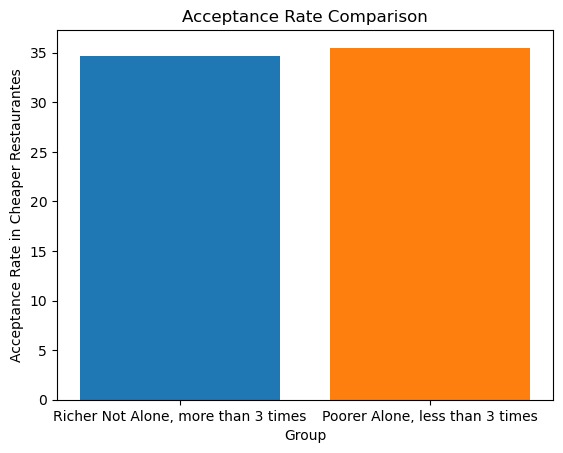

In [118]:


# Data
groups = ['Richer Not Alone, more than 3 times', 'Poorer Alone, less than 3 times']
acceptance_rates = [condition_richer_not_alone_go_restaurant_acceptance, condition_poorer_alone_not_go_restaurant_acceptance]

# Colors
colors = ['#1f77b4', '#ff7f0e']

# Create bar plot
plt.bar(groups, acceptance_rates, color=colors)

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Acceptance Rate in Cheaper Restaurantes')
plt.title('Acceptance Rate Comparison')



# Show the plot
plt.show()